# Linear Regression algorithm on car dataset

<b> load dataset </b>

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#load the dataset
data = pd.read_csv(r'C:\\Users\\santhosh\\Downloads\\archive (4)\\car data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


<b> Clean the Dataset</b>

In [7]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
data.duplicated().sum()

2

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
from datetime import date
data['Age'] = date.today().year - data['Year']
data.drop('Year', axis=1, inplace=True)

In [12]:
data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


In [13]:
data.rename(columns = {'Selling_Price':'Selling_Price(lakhs)', 'Present_Price':'Present_Price(lakhs)', 'Owner':'Past_Owner'}, inplace = True)
data.columns

Index(['Car_Name', 'Selling_Price(lakhs)', 'Present_Price(lakhs)',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owner',
       'Age'],
      dtype='object')

<b>Exploratory data Analysis</b>

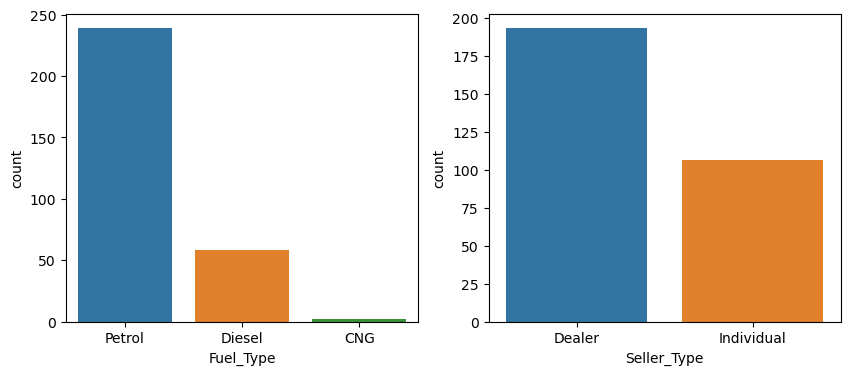

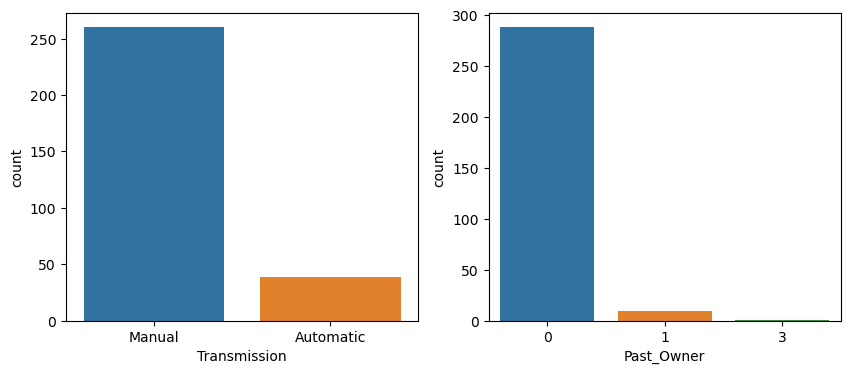

In [14]:
# finding Count plot for Categorical columns
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owner']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    #add subplot[121], subplot[122]
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1

    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=data)
    i += 1
plt.show()

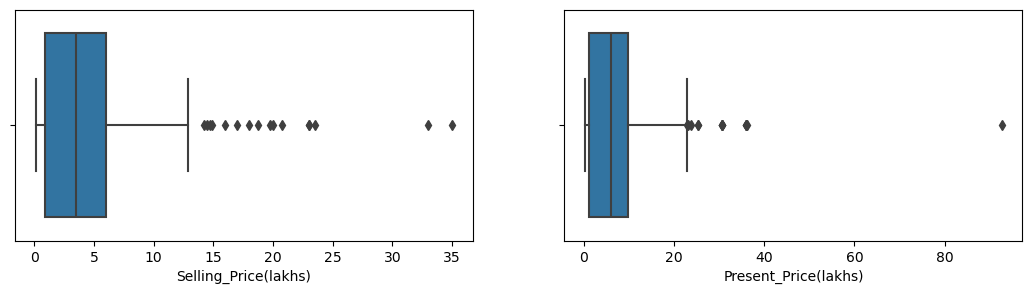

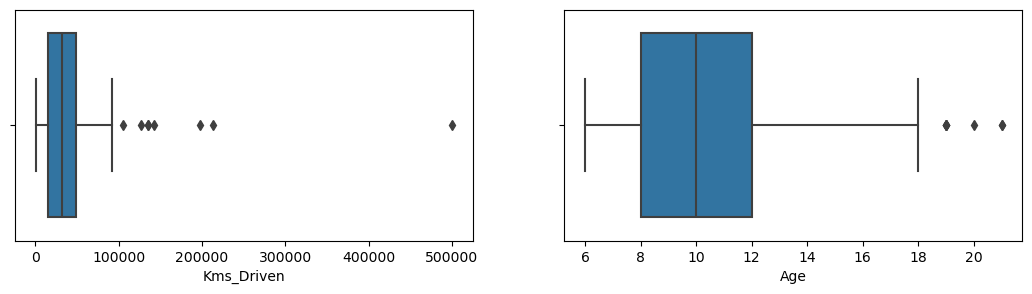

In [15]:
#Finding a box plot for number coloumn
num_cols = ['Selling_Price(lakhs)', 'Present_Price(lakhs)', 'Kms_Driven', 'Age']
i=0
while i < 4:
    fig = plt.figure(figsize = [13,3])

    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1

    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=data)
    i += 1
plt.show()

In [16]:
#Droping the string values
data.drop(labels = 'Car_Name', axis=1, inplace = True)

In [17]:
data = pd.get_dummies(data=data, drop_first = True) # changing the categorical to dummy variables.

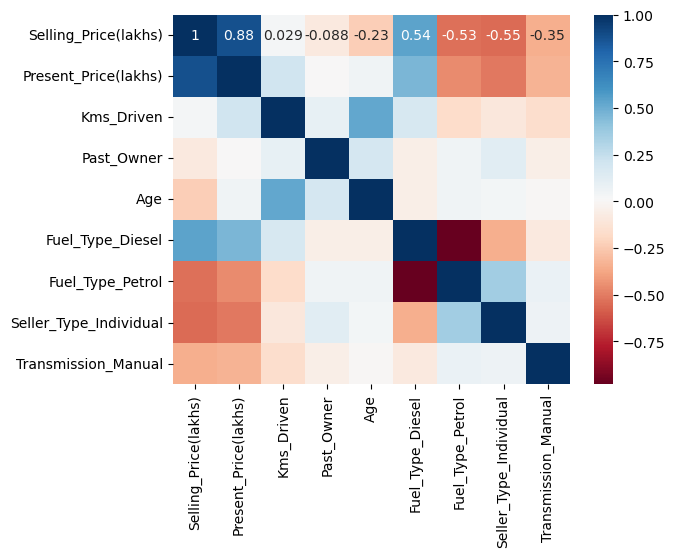

In [18]:
# Finding the co-relation data using the heatmap.
sns.heatmap(data.corr(), annot = True, cmap = "RdBu")
plt.show()

In [19]:
data.corr()['Selling_Price(lakhs)']

Selling_Price(lakhs)      1.000000
Present_Price(lakhs)      0.876378
Kms_Driven                0.028566
Past_Owner               -0.087880
Age                      -0.234369
Fuel_Type_Diesel          0.543541
Fuel_Type_Petrol         -0.531636
Seller_Type_Individual   -0.553851
Transmission_Manual      -0.348869
Name: Selling_Price(lakhs), dtype: float64

<b> Train-Test Split </b>

In [20]:
# Separating target variable and its features
x = data.drop('Selling_Price(lakhs)',axis=1)
y = data['Selling_Price(lakhs)']

In [21]:
x.head()

,Present_Price(lakhs),Kms_Driven,Past_Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,10,False,True,False,True
1,9.54,43000,0,11,True,False,False,True
2,9.85,6900,0,7,False,True,False,True
3,4.15,5200,0,13,False,True,False,True
4,6.87,42450,0,10,True,False,False,True


In [22]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price(lakhs), dtype: float64

In [23]:
#accesing for training and testing

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("x train: ", X_train.shape)
print("x test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y_test: ", y_test.shape)

x train:  (239, 8)
x test:  (60, 8)
y train:  (239,)
y_test:  (60,)


<b>Applying Model</b>

In [24]:
#Create a Linear Regression model

model = LinearRegression()

#Train the model on the training data

model.fit(X_train,y_train)

# Make prediction on the test data

y_pred = model.predict(X_test)

In [25]:
# print the model coeffecients and intercept
print("coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

coefficients:  [ 5.29181181e-01 -5.99046152e-06 -9.44252885e-01 -4.18029869e-01
  2.12111606e+00  4.98109745e-01 -4.73063346e-01 -5.27393308e-01]
Intercept:  5.087110830354567


In [26]:
# evalute the model using Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  5.132840514762979


In [27]:
# finding the Error
error = y_test-y_pred
print(error)

175     1.262443
289     1.265323
52      3.345927
148     1.559795
216    -1.082980
199     2.652313
276     0.306141
63      1.306238
28      0.921152
203     1.212578
114    -0.348554
121     1.147187
11     -1.255952
246     0.325057
112    -0.482567
297    -0.058300
74     -1.828915
107     0.559650
267     0.155521
109    -1.170556
190     2.266256
12      0.506844
71     -3.081056
19     -0.530018
89      0.534825
110    -0.946525
300     0.496975
178    -0.743214
122    -0.773724
252     0.156295
86    -14.363337
298    -0.731607
134    -1.366504
287     0.221770
133    -1.020252
79     -3.356953
255     0.448950
140     0.170242
91      0.583836
191     1.423976
4      -1.281715
195    -0.602167
156    -1.363872
249    -0.383527
81     -2.083019
16     -1.128759
170     0.425322
129    -1.293115
59     -1.821675
187     0.185377
281     0.847188
213    -0.127257
176     0.823698
60     -3.117936
152     0.485581
214     0.222541
193     0.957621
285     0.751189
174    -0.5922

<Axes: ylabel='Selling_Price(lakhs)'>

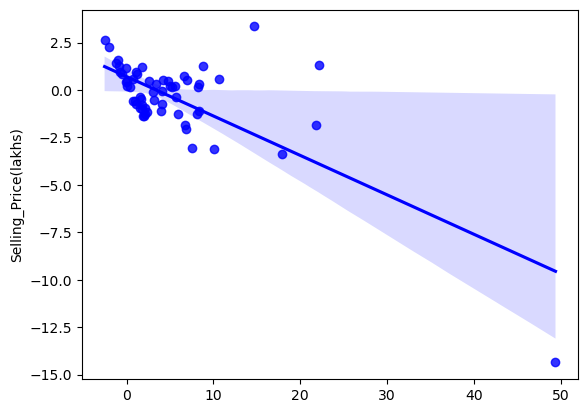

In [28]:
# ploting a predicted value
sns.regplot(x = y_pred, y = error, data = data, color='b') # exact fitline